In [47]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D

In [48]:
dataset_dir = 'images/'

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,              
    shear_range=0.2,             
    zoom_range=0.2,             
    horizontal_flip=True,      
    validation_split=0.2         
)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='categorical',    
    subset='training'            
)

# Load the validation data
validation_generator = train_datagen.flow_from_directory(
    directory=dataset_dir,
    target_size=(150, 150),      
    batch_size=32,
    class_mode='categorical',
    subset='validation'          
)

Found 355 images belonging to 4 classes.
Found 86 images belonging to 4 classes.


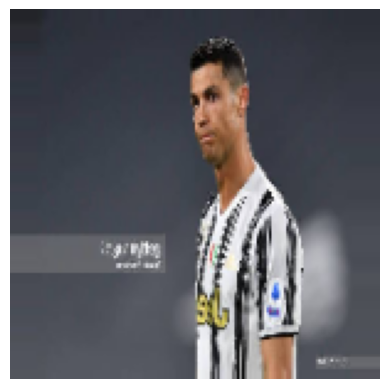

In [50]:
images, labels = next(train_generator)

image = images[0]
label = labels[0]

image = image * 255

image = image.astype(np.uint8)

# Plot the image
plt.imshow(image)
plt.axis('off') 
plt.show()

## Model 1

In [51]:
model1 = models.Sequential()

model1.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='sigmoid'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(train_generator.num_classes, activation='softmax'))

In [52]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history1 = model1.fit(
    train_generator,                
    epochs=15,   
    validation_data = validation_generator,
    batch_size = 32
)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - accuracy: 0.2707 - loss: 20.9709 - val_accuracy: 0.2558 - val_loss: 2.3222
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 275ms/step - accuracy: 0.2515 - loss: 1.8603 - val_accuracy: 0.2674 - val_loss: 1.3863
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - accuracy: 0.2647 - loss: 1.4390 - val_accuracy: 0.2674 - val_loss: 1.3863
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.2861 - loss: 1.3865 - val_accuracy: 0.2674 - val_loss: 1.3862
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 262ms/step - accuracy: 0.2806 - loss: 1.3859 - val_accuracy: 0.2674 - val_loss: 1.3861
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.2713 - loss: 1.3860 - val_accuracy: 0.2674 - val_loss: 1.3861
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 255ms/step - accuracy: 0.2557 - loss: 1.3863 - val_accuracy: 0.2674 - val_loss: 1.3860
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.2908 - loss: 1.3857 - val_accuracy: 0

Text(0, 0.5, 'Loss')

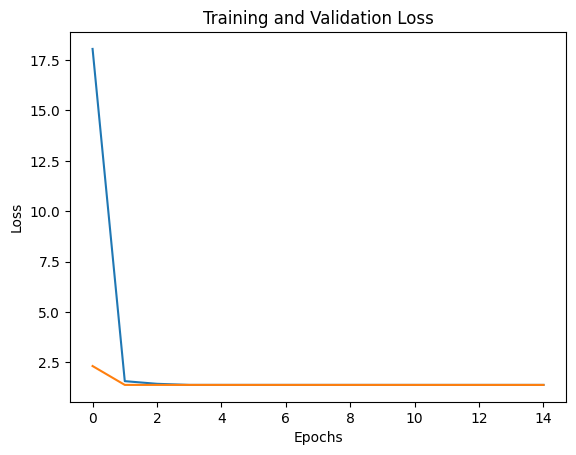

In [55]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Model 2 changing activation function and Pooling type

In [56]:
model2 = models.Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(AveragePooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(AveragePooling2D((2, 2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(train_generator.num_classes, activation='softmax'))

In [57]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
history2 = model2.fit(
    train_generator,                
    epochs=15,   
    validation_data = validation_generator,
    batch_size = 32
)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.2776 - loss: 2.3534 - val_accuracy: 0.3953 - val_loss: 1.2598
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step - accuracy: 0.4627 - loss: 1.2695 - val_accuracy: 0.5930 - val_loss: 1.0663
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 291ms/step - accuracy: 0.5010 - loss: 1.1488 - val_accuracy: 0.5814 - val_loss: 1.0538
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.5217 - loss: 1.0760 - val_accuracy: 0.5814 - val_loss: 1.0363
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 282ms/step - accuracy: 0.6503 - loss: 0.8993 - val_accuracy: 0.5814 - val_loss: 1.1994
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 296ms/step - accuracy: 0.5829 - loss: 1.0156 - val_accuracy: 0.6163 - val_loss: 0.9961
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.6420 - loss: 0.8918 - val_accuracy: 0.6279 - val_loss: 1.0382
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.7333 - loss: 0.7812 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

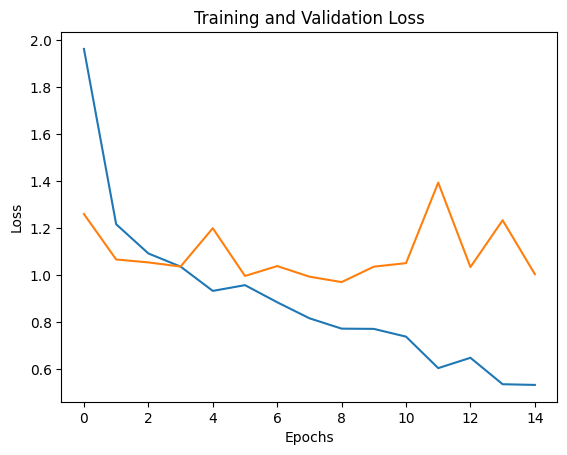

In [59]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Model 3: Adding one more layer of convolution

In [70]:
model3 = models.Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(180, activation='relu'))
model3.add(Dense(train_generator.num_classes, activation='softmax'))

In [71]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
history3 = model3.fit(
    train_generator,                
    epochs=15,   
    validation_data = validation_generator,
    batch_size = 64
)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.2785 - loss: 1.4907 - val_accuracy: 0.3953 - val_loss: 1.3181
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.3975 - loss: 1.2869 - val_accuracy: 0.4767 - val_loss: 1.1619
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.4669 - loss: 1.1561 - val_accuracy: 0.5698 - val_loss: 1.0043
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.5787 - loss: 1.0957 - val_accuracy: 0.6047 - val_loss: 1.0384
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.5800 - loss: 1.0215 - val_accuracy: 0.6395 - val_loss: 0.9231
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.6431 - loss: 0.9159 - val_accuracy: 0.5233 - val_loss: 1.1973
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - accuracy: 0.5879 - loss: 1.0348 - val_accuracy: 0.5349 - val_loss: 1.0579
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.6727 - loss: 0.8258 - val_accuracy: 0.

Text(0, 0.5, 'Loss')

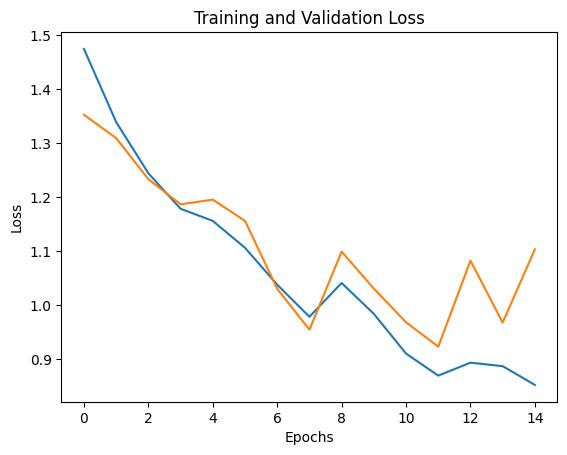

In [63]:
plt.plot(history3.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history3.history['val_loss'], label='Validation Loss')

# Adding titles and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')